In [1]:
#import the required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import nanmedian
import random

In [2]:
df = pd.read_csv("responses.csv")

In [3]:
#fill the nan values using the medians
df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.median()))

In [4]:
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{'Smoking': 8, 'Alcohol': 5, 'Punctuality': 2, 'Lying': 2, 'Achievements': 2, 'Gender': 6, 'Left - right handed': 3, 'Education': 1, 'Only child': 2, 'Village - town': 4, 'House - block of flats': 4}


In [5]:
def replace(col):
    #find the unique values
    un=pd.unique(df[col])
    j=1
    #dictionary used to map the categorical variables
    dict_1={}
    for i in un[:-1]:
        dict_1[i]=j
        j+=1
    # un[-1] has nan in it. Hence that must have a value of zero initially
    dict_1[un[-1]]=0   
    #print(dict_1)
    x=[]
    #list containing the integer values of the categorical variales
    for index,row in df[col].iteritems():
        x.append((dict_1[row])) 
    med=np.median(x)
    #the zero valued rows are replaced with the median
    for i in range (0,len(x)):
        if(x[i]==0):
            x[i]=int(med)
    # assign it to the dataframe
    df[col]=x
    
NaN_Col=['Smoking','Alcohol','Punctuality','Lying','Education']
for i in NaN_Col:
    replace(i)

In [6]:
def replace2(col):
    #find the unique values
    un=pd.unique(df[col])
    j=1
    #dictionary used to map the categorical variables
    dict_1={}
    for i in un:
        dict_1[i]=j
        j+=1  
    #print(dict_1)
    x=[]
    #list containing the integer values of the categorical variales
    for index,row in df[col].iteritems():
        x.append((dict_1[row])) 
    # assign it to the dataframe
    df[col]=x
    
replace2('Internet usage')
print(df['Internet usage'])

0       1
1       1
2       1
3       2
4       1
5       1
6       3
7       1
8       1
9       1
10      3
11      1
12      1
13      1
14      2
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
980     3
981     2
982     1
983     1
984     2
985     1
986     1
987     1
988     1
989     2
990     1
991     2
992     2
993     1
994     1
995     1
996     1
997     3
998     1
999     1
1000    1
1001    1
1002    1
1003    1
1004    1
1005    1
1006    3
1007    2
1008    2
1009    1
Name: Internet usage, Length: 1010, dtype: int64


In [7]:
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{'Achievements': 2, 'Gender': 6, 'Left - right handed': 3, 'Only child': 2, 'Village - town': 4, 'House - block of flats': 4}


female    593
male      411
Name: Gender, dtype: int64
59.06374501992032 40.93625498007968


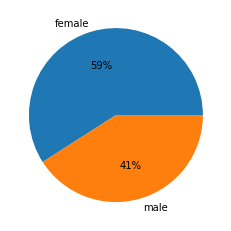

In [8]:
valcount=df.Gender.value_counts()
print(valcount)
noperc=(valcount['female']/(valcount['male']+valcount['female']))*100
yesperc=(valcount['male']/(valcount['male']+valcount['female']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['female','male'], autopct='%1.0f%%')
plt.show()

In [9]:
for index,row in df.Gender.iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=60):
            df.Gender.loc[index]='female'
        else:
            df.Gender.loc[index]='male'

C:\Users\Sanjana moudgalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


89.97020854021847 10.02979145978153


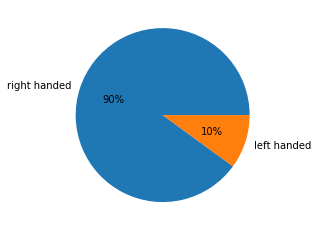

In [10]:
valcount=df['Left - right handed'].value_counts()
noperc=(valcount['right handed']/(valcount['right handed']+valcount['left handed']))*100
yesperc=(valcount['left handed']/(valcount['right handed']+valcount['left handed']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['right handed','left handed'], autopct='%1.0f%%')
plt.show()

In [11]:
for index,row in df['Left - right handed'].iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=90):
            df['Left - right handed'].loc[index]='right handed'
        else:
            df['Left - right handed'].loc[index]='left handed'

74.8015873015873 25.198412698412696


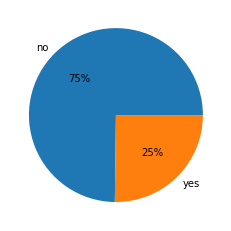

In [12]:
valcount=df['Only child'].value_counts()
noperc=(valcount['no']/(valcount['yes']+valcount['no']))*100
yesperc=(valcount['yes']/(valcount['yes']+valcount['no']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['no','yes'], autopct='%1.0f%%')
plt.show()

In [13]:
for index,row in df['Only child'].iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=75):
            df['Only child'].loc[index]='no'
        else:
            df['Only child'].loc[index]='yes'

29.721669980119287 70.27833001988071


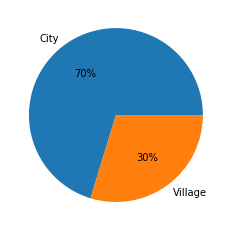

In [14]:
valcount=df['Village - town'].value_counts()
noperc=(valcount['village']/(valcount['village']+valcount['city']))*100
yesperc=(valcount['city']/(valcount['village']+valcount['city']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['City','Village'], autopct='%1.0f%%')
plt.show()

In [15]:
for index,row in df['Village - town'].iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=70):
            df['Village - town'].loc[index]='city'
        else:
            df['Village - town'].loc[index]='village'

40.85487077534791 59.14512922465208


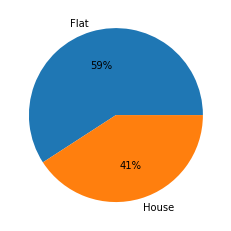

In [16]:
valcount=df['House - block of flats'].value_counts()
noperc=(valcount['house/bungalow']/(valcount['house/bungalow']+valcount['block of flats']))*100
yesperc=(valcount['block of flats']/(valcount['house/bungalow']+valcount['block of flats']))*100
print(noperc,yesperc)

plt.pie(valcount,labels=['Flat','House'], autopct='%1.0f%%')
plt.show()

In [17]:
for index,row in df['House - block of flats'].iteritems():
    if(isinstance(row,float)):
        x=random.randint(1,100)
        if (x>=1 and x<=60):
            df['House - block of flats'].loc[index]='block of flats'
        else:
            df['House - block of flats'].loc[index]='house/bungalow'

In [18]:
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{'Achievements': 2}


In [19]:
# replacing 1 and 2 for binary variables
def replace1(col):
    un=pd.unique(df[col])
    j=1
    dict_1={}
    dict_2={}
    for i in un:
        dict_1[i]=j
        j+=1  
    print(dict_1)
    x=[]
    for index,row in df[col].iteritems():
        x.append((dict_1[row])) 
    df[col]=x
    
NaN_Col=['Gender', 'Left - right handed', 'Only child', 'Village - town', 'House - block of flats']
for i in NaN_Col:
    replace1(i)

{'female': 1, 'male': 2}
{'right handed': 1, 'left handed': 2}
{'no': 1, 'yes': 2}
{'village': 1, 'city': 2}
{'block of flats': 1, 'house/bungalow': 2}


In [20]:
df = df.groupby(df.columns, axis = 1).transform(lambda x: x.fillna(x.median()))

In [21]:
med1=np.nanmedian(df.Achievements)
for index,row in df.Achievements.iteritems():
    a=df.Achievements.isnull()
    for val in a:
        if(val == True):
            df.Achievements.loc[index]=med1           

C:\Users\Sanjana moudgalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
def nancount(x):
    count=0
    a=df[x].isnull()
    for val in a:
        if(val == True):
            count+=1
    return count
    
counts={}
for i in df.columns:
    returnval=nancount(i)
    if(returnval!=0):
        counts[i]=nancount(i)
print(counts)

{}


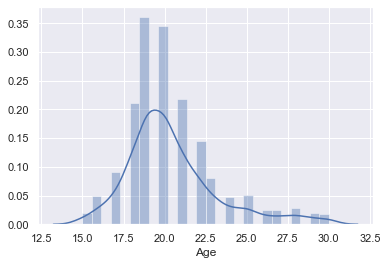

In [23]:
#histogram of age
import seaborn as sns
sns.set(color_codes=True)
sns.distplot(df.Age)
plt.show()

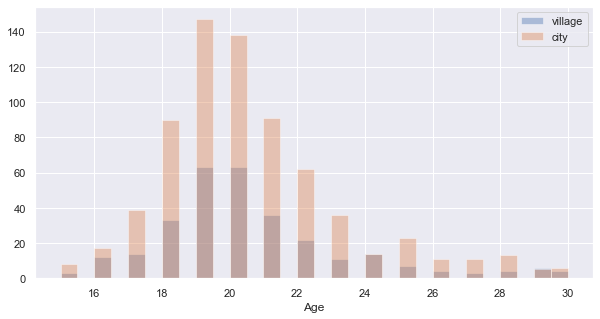

In [24]:
#Histogram of age grouped by place of stay
fig, ax = plt.subplots(figsize=(10,5))

var_of_int_ser = df['Village - town']
sns.distplot(df[var_of_int_ser==1].Age.dropna(),
             label='village', ax=ax, kde=False, bins=30);

sns.distplot(df[var_of_int_ser==2].Age.dropna(),
             label='city', ax=ax, kde=False, bins=30);
ax.legend()

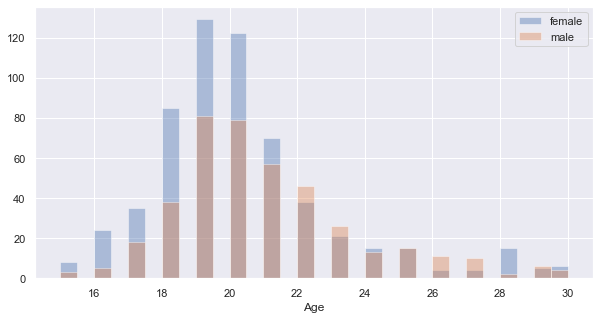

In [25]:
#histogram of age grouped by gender
fig, ax = plt.subplots(figsize=(10,5))

var_of_int_ser = df['Gender']
sns.distplot(df[var_of_int_ser==1].Age.dropna(),
             label='female', ax=ax, kde=False, bins=30);

sns.distplot(df[var_of_int_ser==2].Age.dropna(),
             label='male', ax=ax, kde=False, bins=30);
ax.legend()

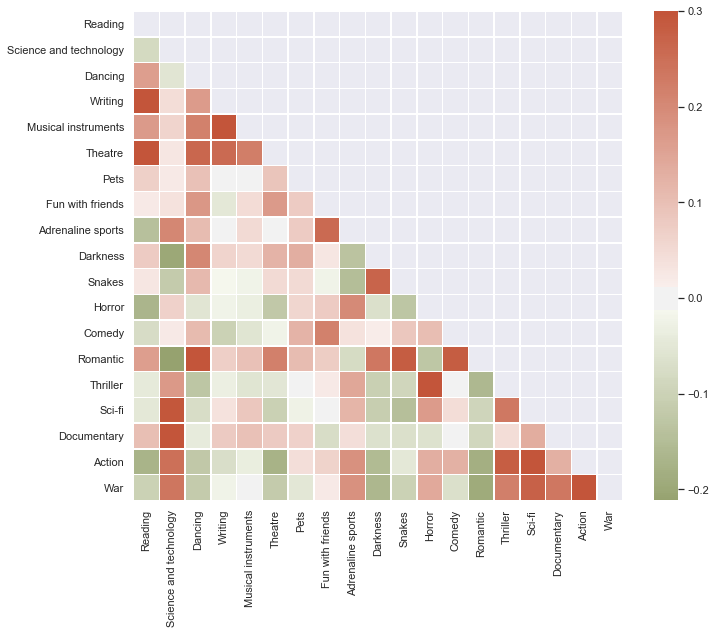

In [26]:
#selecting the important variables for hobbies and interests in data and plotting a correlation grid
data=['Reading','Science and technology','Dancing','Writing','Musical instruments','Theatre','Pets','Fun with friends','Adrenaline sports',
     'Darkness','Snakes','Horror','Comedy','Romantic','Thriller','Sci-fi','Documentary','Action','War']
corr = df[data].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(100, 20, as_cmap=True)
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=.3,
    center=0,
    square=True,
    linewidths=.5)

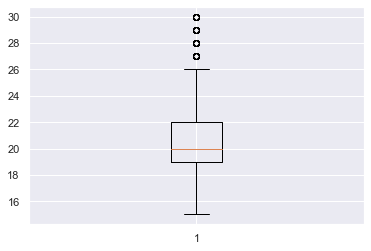

In [27]:
#boxplot of Age (since the outliers aren't way out of bound, cleaning it is not needed)
plt.boxplot(df['Age'])
plt.ylabel('Age')
plt.show()

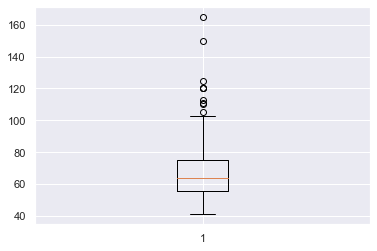

C:\Users\Sanjana moudgalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [28]:
#boxplot of weight before cleaning
plt.boxplot(df.Weight)
plt.show()
#converting pound to kg as outliers is in pound (kg does not make sense)
for index,row in df.Weight.iteritems():
    if(row>=100):
        df.Weight.loc[index]=row*0.454

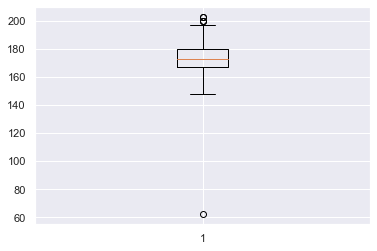

C:\Users\Sanjana moudgalya\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
#boxplot of height before cleaning
plt.boxplot(df.Height)
plt.show()
#converting inch to cm as 60cm is not possible for a human
for index,row in df.Height.iteritems():
    if(row<=130):
        df.Height.loc[index]=row*2.54   

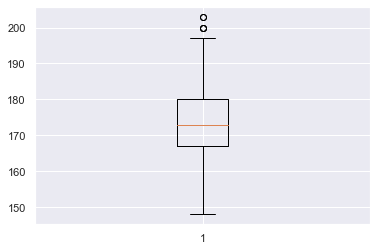

In [30]:
#plot of height after replacing outliers
plt.boxplot(df.Height)
plt.show()

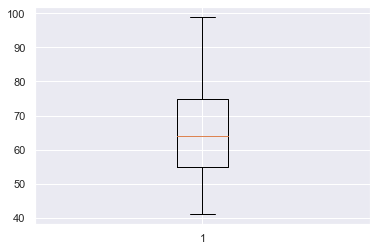

In [31]:
#plot of weight after replacing outliers
plt.boxplot(df.Weight)
plt.show()

In [32]:
#calculating bmi
df['BMI'] = round(df['Weight']/((df['Height']/100)**2),1)

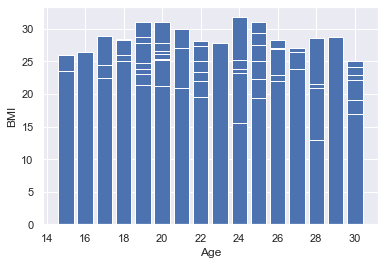

In [33]:
#plot for BMI vs Age
plt.bar(df['Age'],df['BMI'])
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

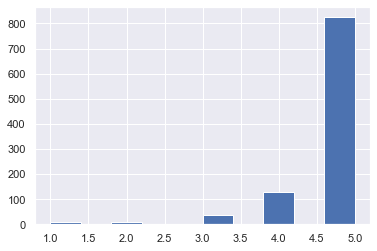

In [34]:
#histogram, median, mean for Music
plt.hist(df.Music)
print(np.median(df.Music))
print(np.mean(df.Music))
plt.xlabel('Music rated based on likes')
plt.show()

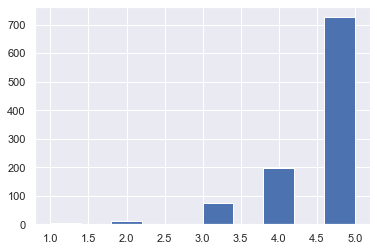

In [35]:
plt.hist(df.Movies)
print(np.median(df.Movies))
print(np.mean(df.Movies))
plt.xlabel('Movies rated based on likes')
plt.show()